# I- Graphical analysis of time series 
We are interested in the data describing the sales volume of sports equipment in the USA (in MD), available on [Github](https://raw.githubusercontent.com/sami-sifi/DATA-16-17/master/Volume%20des%20ventes%20de%20materiels%20sportif%20en%20MD%20au%20USA/Volume%20des%20ventes.txt).
This is a series of monthly frequency observations from January 1992 to March 2014.

## Data importing

In [1]:
SP<-"https://raw.githubusercontent.com/sami-sifi/DATA-16-17/master/Volume%20des%20ventes%20de%20materiels%20sportif%20en%20MD%20au%20USA/Volume%20des%20ventes.txt"
sp.data<-read.table(SP)
class(sp.data)
# the data are of type data.frame, we transform them under the class ts
# by indicating the start date and the frequency (we can also give the end date if needed).
sp.ts<-ts(sp.data, start=c(1992,1), freq=12)

[1] "data.frame"

## Graphical exploration of data

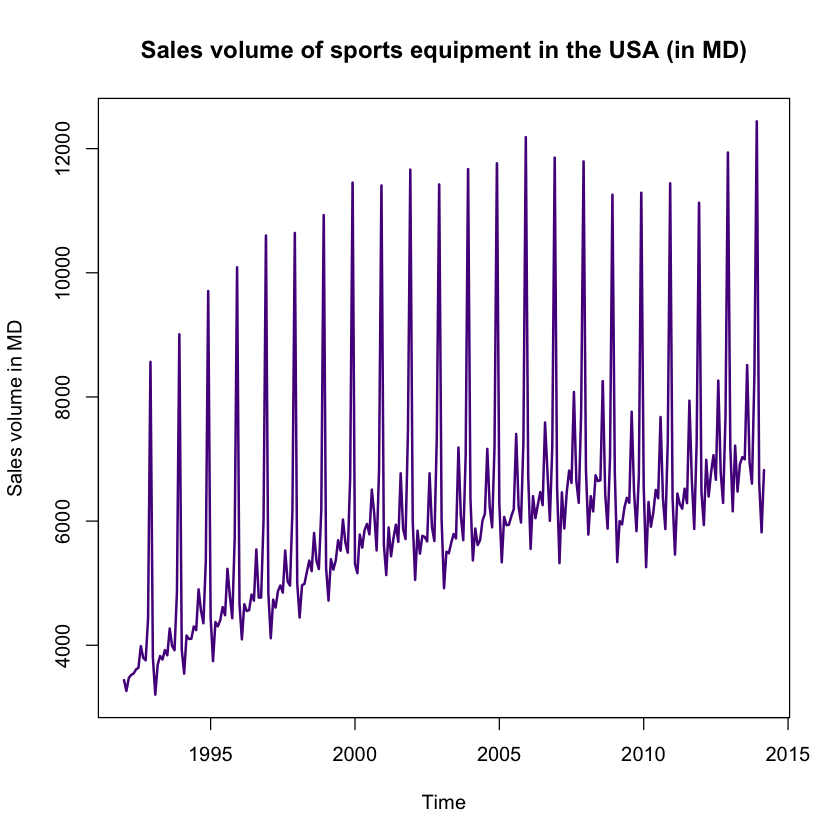

In [2]:
plot(sp.ts, xlab="Time", ylab="Sales volume in MD",
     main="Sales volume of sports equipment in the USA (in MD)",
     col="purple4",lwd=2)

Through the graphical representation of the data to be studied, we notice the presence of a trend and seasonality. To be sure of what has been observed, the autocorrelation function `acf` is examined.

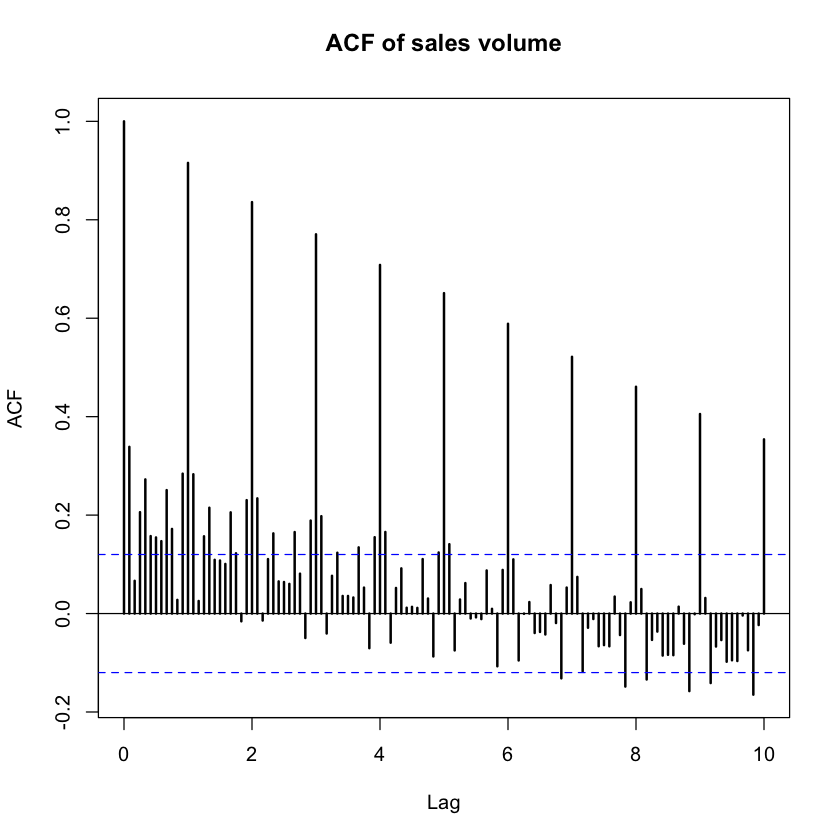

In [3]:
acf(sp.ts,lag=120,main="ACF of sales volume",lwd=2)

The acf has a slow decay which confirms our hypothesis of the presence of a trend as well as a damped repetitive behaviour which informs us about the presence of a seasonality. 

# II- Time series modeling  
We consider that our TS is expressed in the following form:  
$$y_t=f(t;\Lambda)+\varepsilon_t, \quad t\in T$$
where:  
- $f(t;\Lambda)$ denotes the deterministic component with a parameter vector $\Lambda$  
- $\varepsilon_t$ denotes the stochastic component  

## II-1- Deterministic component modeling 
In this example, the deterministic component includes the trend and seasonal component.

### The trend component  
The question that arises at this level is: which model should be chosen for the trend?  
To get an idea of the behaviour of the trend, we can plot the result of the additive decomposition (the choice of this decoposition is justified by the fact that the amplitudes of the data are more or less constant over time, otherwise for a multiplicative model, we can apply the logarithm  function on the data to reduce their variabilities and then transform it to an additive model).

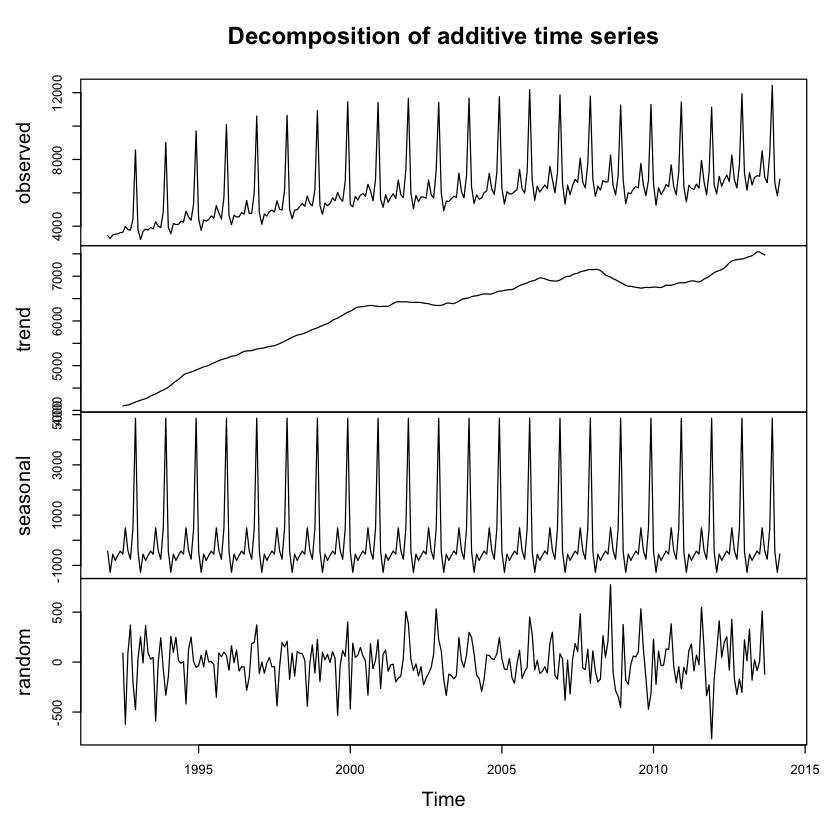

In [4]:
plot(decompose(sp.ts,type=c("additive")))

The output of the `decompose` function with respect to the trend (via a moving average) leads us to choose a polynomial model of order 1 or 2.  
***Note:*** we can go beyond order 3 and consider the model that returns the smallest value of the AIC or BIC criterion or the highest value of the adjusted $R^2$ coefficient.  
  
***Warning:*** The 'seasonal' output of the decompose function is not a good indicator of the presence of seasonality. Indeed, to determine the seasonal component the decompose function determines a pattern and duplicates it every period T (here T=12). Each element of the pattern (we have T) is calculated as an average of the values associated with the same index for the different periods (for example, in our case, the first element corresponds to the average of the values associated to the  January month over the study period). Therefore, a pattern can be created and duplicated while the TS does not show any seasonality.


### The seasonal component  
A first way to estimate the seasonal component for a period $T=12$ is to express it in this form:
$$s(t;\theta)=\sum_{i=1}^{\frac{T}{2}}\beta_i\cos{(\frac{2\pi i}{T}t)}+\gamma_i\sin{(\frac{2\pi i}{T}t)},\ t\in\mathbb{N}$$
where $\theta=[\beta_1,\cdots,\beta_{\frac{T}{2}},\gamma_1,\cdots,\gamma_{\frac{T}{2}}]$.  

The parameter vector $\theta$ as well as the parameters of the polynomial model considered for the modelling of the trend will be estimated by the method of least squares via the function `lm`.  
  
A second way to estimate the seasonal component is to use dummy variables. For a period $T$, we will have $T$ dummy variables, the ith of which contains zeros everywhere except for the values associated with index i of each period, it takes 1. The $T$ dummy variables correspond to descriptive variables whose adjustment will also be done by the `lm` function.

In [5]:
# Determination of the descriptive variable related to the seasonal component

t<-c(1:length(sp.ts))
s.t<-(t-mean(t))/sd(t) # this variable is introduced in order to guarantee the same order of magnitude of the different descriptive variables

#First method:

CS<-matrix(0,length(sp.ts),6)
SN<-matrix(0,length(sp.ts),6)
for (i in 1:6) CS[,i]<-cos(2*pi*i*t/12)
for (i in 1:6) SN[,i]<-sin(2*pi*i*t/12) # we can stop at 5 as the 6th variable is zero.

#Second method
library(forecast)
DV<-seasonaldummy(sp.ts) # a matrix composed of all dummy variables

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


### First deterministic model:
$$f(t;\Lambda)=\alpha_0+\alpha_1 t + \sum_{i=1}^{6}\beta_i\cos{(\frac{2\pi i}{12}t)}+\gamma_i\sin{(\frac{2\pi i}{12}t)}$$  
with $\Lambda=[\alpha_0,\alpha_1,\beta_1,\cdots,\beta_{6},\gamma_1,\cdots,\gamma_{6}].$

In [6]:
Model1<-lm(sp.ts~s.t+CS+SN)
summary(Model1)


Call:
lm(formula = sp.ts ~ s.t + CS + SN)

Residuals:
     Min       1Q   Median       3Q      Max 
-1253.22  -264.45    40.37   274.65   897.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.187e+03  2.449e+01 252.689  < 2e-16 ***
s.t          8.888e+02  2.454e+01  36.211  < 2e-16 ***
CS1          9.038e+02  3.471e+01  26.041  < 2e-16 ***
CS2          1.001e+03  3.469e+01  28.871  < 2e-16 ***
CS3          1.174e+03  3.471e+01  33.833  < 2e-16 ***
CS4          8.672e+02  3.473e+01  24.968  < 2e-16 ***
CS5          5.698e+02  3.477e+01  16.385  < 2e-16 ***
CS6          3.528e+02  2.765e+01  12.757  < 2e-16 ***
SN1         -3.763e+02  3.457e+01 -10.886  < 2e-16 ***
SN2         -2.300e+01  3.463e+01  -0.664    0.507    
SN3         -1.424e+02  3.457e+01  -4.118 5.17e-05 ***
SN4         -2.421e+02  3.465e+01  -6.986 2.50e-11 ***
SN5          1.506e+02  3.459e+01   4.355 1.94e-05 ***
SN6          1.364e+13  7.419e+14   0.018    0.985    
---
Signif. c

### Second deterministic model :  
$$f(t;\Lambda)=\alpha_0+\alpha_1 t +\alpha_2 t^2+ \sum_{i=1}^{6}\beta_i\cos{(\frac{2\pi i}{12}t)}+\gamma_i\sin{(\frac{2\pi i}{12}t)}$$  
with $\Lambda=[\alpha_0,\alpha_1,\alpha_2,\beta_1,\cdots,\beta_{6},\gamma_1,\cdots,\gamma_{6}].$

In [7]:
Model2<-lm(sp.ts~s.t+I(s.t^2)+CS+SN)
summary(Model2)


Call:
lm(formula = sp.ts ~ s.t + I(s.t^2) + CS + SN)

Residuals:
    Min      1Q  Median      3Q     Max 
-888.77 -147.81    3.63  159.85  925.66 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.494e+03  2.624e+01 247.469  < 2e-16 ***
s.t          8.882e+02  1.751e+01  50.740  < 2e-16 ***
I(s.t^2)    -3.079e+02  1.966e+01 -15.664  < 2e-16 ***
CS1          9.109e+02  2.476e+01  36.791  < 2e-16 ***
CS2          9.954e+02  2.474e+01  40.229  < 2e-16 ***
CS3          1.171e+03  2.476e+01  47.297  < 2e-16 ***
CS4          8.652e+02  2.477e+01  34.925  < 2e-16 ***
CS5          5.663e+02  2.480e+01  22.831  < 2e-16 ***
CS6          3.602e+02  1.973e+01  18.256  < 2e-16 ***
SN1         -3.657e+02  2.466e+01 -14.827  < 2e-16 ***
SN2         -1.575e+01  2.470e+01  -0.638    0.524    
SN3         -1.418e+02  2.466e+01  -5.751 2.56e-08 ***
SN4         -2.410e+02  2.472e+01  -9.750  < 2e-16 ***
SN5          1.524e+02  2.467e+01   6.177 2.61e-09 ***
SN6         

According to the two outputs, we notice that the variables SN2 and SN6 are not significant. Their observed T-statistics are between -1.96 and 1.96 and also the pvalues are higher than 0.05. So we can eliminate them. 

###  Models  comparison
Through the fitting results using both models we can notice:   

1. All parameters, except those associated with SN2 and SN6, are significant based on a hypothesis test at 5% risk: the alternative hypothesis is considered (the underlying variable is significant). The value of the observed T-statistic is either lower than -1.96 or higher than 1.96. We can also decide through the pvalues (<=0.05).  
  
  

2. The value of the coefficient of determination $R^2$ of the 2nd model is higher than that of the 1st model. This is expected since we increased the order of the model associated to the trend, hence  the number of descriptive variables is increased. Consequently,  the variable to be explained (sp.ts) is better explained, so the variance explained will approach the total one. This does not necessarily imply that model 2 is more reliable than model 1 (think of the overfitting problem). We need another criterion to decide. We then examine the adjusted coefficient of determination $R_a^2$ which takes into account the number of parameters to be estimated.  

  
3. The adjusted coefficient of determination $R_a^2$ of model 2 is much higher than that of model 1. This confirms that model 2 is more adequate.  
 
   
4. We can also check the values given by the two crieters AIC and BIC to be more sure that the model to be chosen is the second one. Unlike $R_a^2$ criterion, for the AIC and the BIC, we must choose the model that gives the lowest value of these two criteria.

***Note:***  We can also use `seasonaldummy` to model the seasonal part as follows:  
Model3<-lm(sp.ts~s.t+I(s.t^2)+DV)  
You can check that resultas ars some how similar.

In [8]:
Model3<-lm(sp.ts~s.t+I(s.t^2)+DV)
summary(Model3)


Call:
lm(formula = sp.ts ~ s.t + I(s.t^2) + DV)

Residuals:
    Min      1Q  Median      3Q     Max 
-868.80 -148.14    3.78  175.80  891.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11355.21      63.78  178.04   <2e-16 ***
s.t           888.80      17.50   50.78   <2e-16 ***
I(s.t^2)     -306.47      19.62  -15.62   <2e-16 ***
DVJan       -5323.23      85.12  -62.54   <2e-16 ***
DVFeb       -6128.40      85.12  -72.00   <2e-16 ***
DVMar       -5412.25      85.12  -63.59   <2e-16 ***
DVApr       -5659.51      86.06  -65.77   <2e-16 ***
DVMay       -5469.84      86.05  -63.56   <2e-16 ***
DVJun       -5296.65      86.05  -61.55   <2e-16 ***
DVJul       -5418.99      86.05  -62.98   <2e-16 ***
DVAug       -4368.15      86.04  -50.77   <2e-16 ***
DVSep       -5273.51      86.04  -61.29   <2e-16 ***
DVOct       -5622.78      86.04  -65.35   <2e-16 ***
DVNov       -4381.03      86.04  -50.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

In [9]:
AIC(Model1)
AIC(Model2) # The lowest value is given by model 2
BIC(Model1)
BIC(Model2) # The lowest value is given by model 2

[1] 3972.733

[1] 3793.204

[1] 4026.541

[1] 3850.6

### Graphical representation of the fitted model

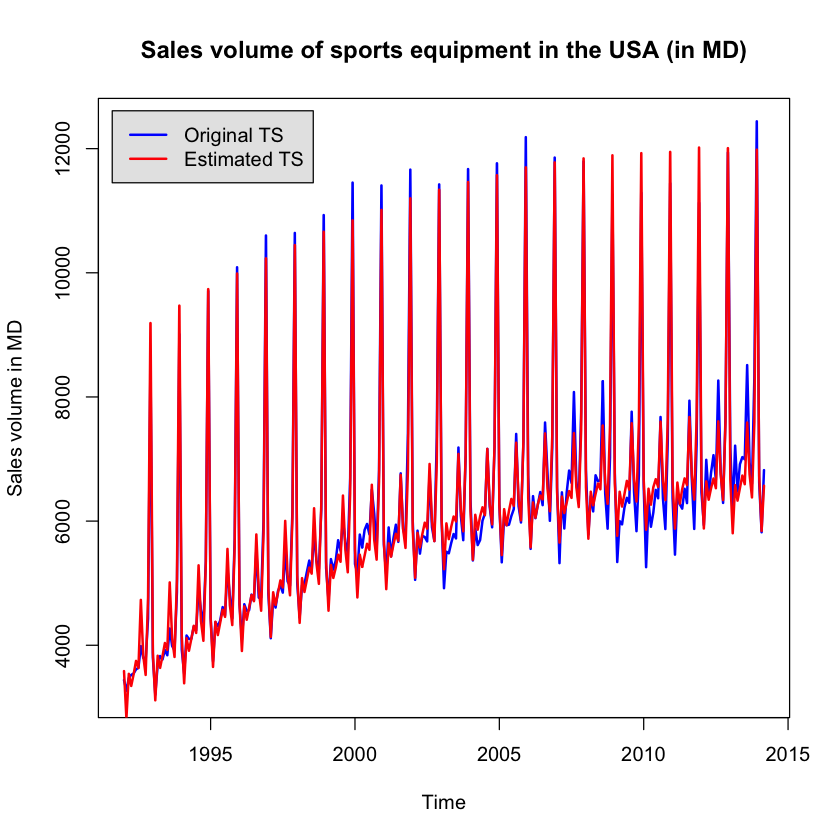

In [10]:
plot(sp.ts, xlab="Time", ylab="Sales volume in MD",
     main="Sales volume of sports equipment in the USA (in MD)",
     col="blue",lwd=2)
points(time(sp.ts),fitted(Model2),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

## II-2-  Modelling the stochastic  component (residual)

### Graphical representation of the residual component 

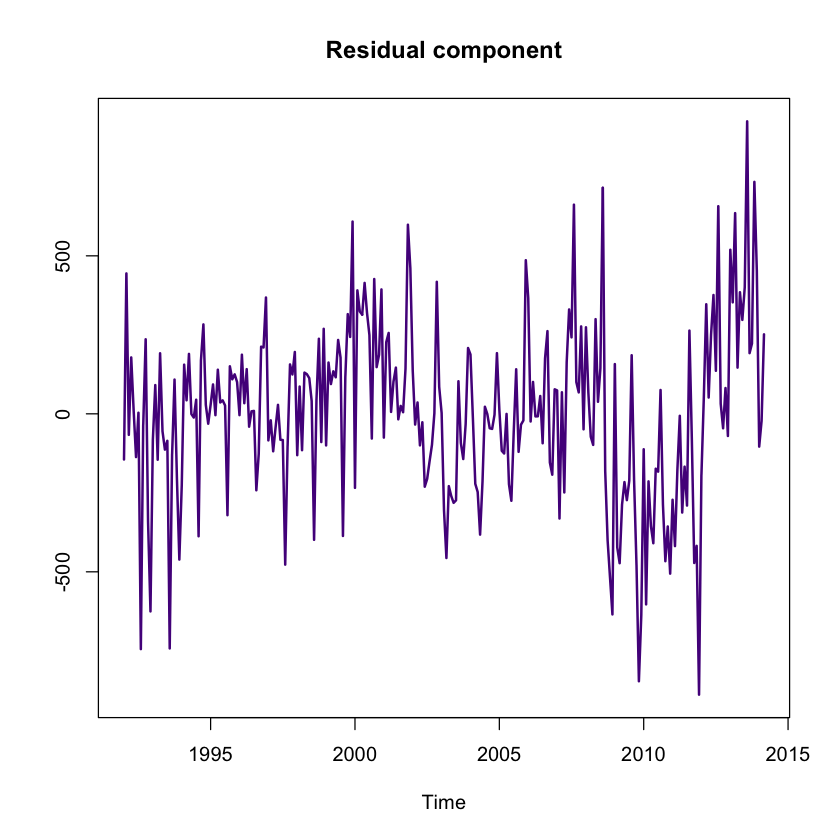

In [11]:
sp.res<-Model2$residuals
plot(time(sp.ts),sp.res, xlab="Time", ylab="",
     main="Residual component",
     col="purple4",lwd=2,type="l")

### Stationarity test  
In order to be able to model the residuals by an ARMA model, it is necessary to ensure their stationarity. To do this, we will use the Augmented Dickey Fuller test `adf.test()` under the `tseries` package. If :  

 1. Stationarity is ensured then :  
     a. If the residuals match white noise, ***the model is perfect!***  
     b. If the residuals do not correspond to white noise, we move on to modelling by an ARMA model.  
 
2. The stationarity is not ensured so we apply differentiations as many times as necessary to stationarise the series and return to the first point.

In [12]:
library(tseries)
adf.test(sp.res)


	Augmented Dickey-Fuller Test

data:  sp.res
Dickey-Fuller = -3.2319, Lag order = 6, p-value = 0.08299
alternative hypothesis: stationary


By comparing the pvalue resulting from the Dickey-Fuller test, we find that it is greater than 0.05, so the null hypothesis is accepted: the hypothesis of non-stationarity. We then apply a differentiation on the residuals and test once again for stationarity.

In [13]:
d.sp.res=diff(sp.res)
adf.test(d.sp.res)

Warning message in adf.test(d.sp.res):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  d.sp.res
Dickey-Fuller = -8.8309, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


The pvalue <0.05 so we accept the alternative hypothesis: the differentiated data are stationary.

### Box \& Pierce test: `Box.test()`
We test whether the new variable `d.sp.res` is a white noise or not. To do this, we can proceed in two different ways:  
  
1. Plot the acf and check the absence of autocorrelation.  
  
2. Apply the Box-Pierce test via the `Box.test()` command.


	Box-Pierce test

data:  d.sp.res
X-squared = 38.492, df = 1, p-value = 5.497e-10


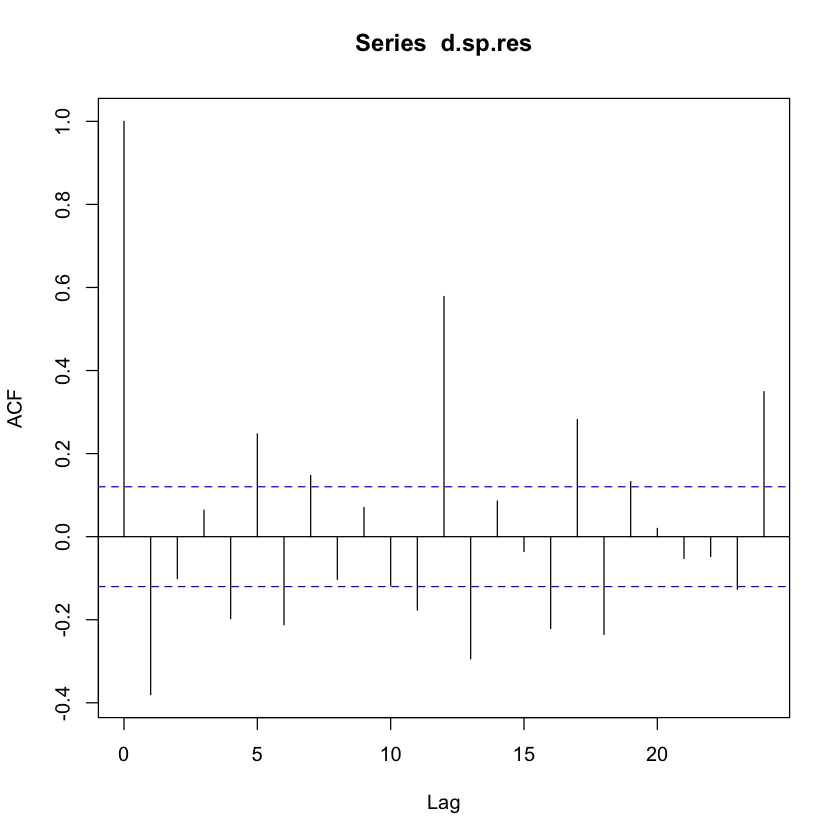

In [14]:
acf(d.sp.res)
Box.test(d.sp.res)

The acf does indicate the presence of autocorrelation and the Box-Pierce test also indicates through the pvalue<0.05 that the alternative hypothesis is considered: the noise is not white.  
  
It is now necessary to model the resulting stationary data by an ARMA model.  

### ARMA model for the differentiated residual component  
To get an idea of the order $p$ of the AR model and the order $q$ of the MA model, we plot the acf and pacf of the differentiated residual data.


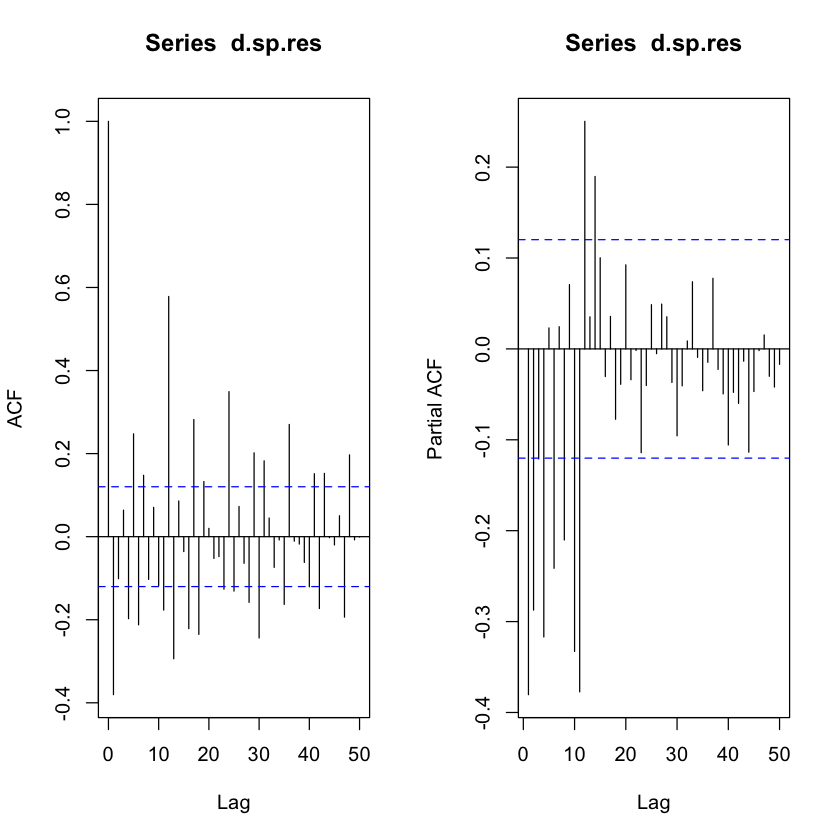

In [139]:
par(mfrow=c(1,2))
acf(d.sp.res,50)
pacf(d.sp.res,50)

We can see that it is difficult to determine $p$ and $q$ from the plots of the acf and pacf. We can use the `auto.arima()` function of the `forecast` package.  
***Note:*** The `trace` input of the `auto.arima` function returns the used models with their residuals sigma^2: the model with lowest sigma^2 is selected. We note as well that  applying `auto.arima` on differentiated data corresponds to apply it  on non differentiated data by indicating `d=1`: the differnetiation will be considered implicitly.  

***Note: ARMA and ARIMA models are used to model stationary TS. However, ARIMA model could be used in some cases when TS is not stationnary w.r.t the trend only (the expectation is non constant): the elimination of trend could be done by integration.***

In [118]:
library(forecast)
#ARIMA.d=auto.arima(d.sp.res,trace=TRUE)
ARIMA=auto.arima(sp.res,d=1,trace=TRUE)



 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 3668.434
 ARIMA(0,1,0) with drift         : 3770.429
 ARIMA(1,1,0) with drift         : 3727.002
 ARIMA(0,1,1) with drift         : 3680.291
 ARIMA(0,1,0)                    : 3768.405
 ARIMA(1,1,2) with drift         : 3665.872
 ARIMA(0,1,2) with drift         : 3674.375
 ARIMA(1,1,1) with drift         : 3685.463
 ARIMA(1,1,3) with drift         : 3667.964
 ARIMA(0,1,3) with drift         : 3676.439
 ARIMA(2,1,1) with drift         : 3672.627
 ARIMA(2,1,3) with drift         : 3666.471
 ARIMA(1,1,2)                    : 3663.838
 ARIMA(0,1,2)                    : 3672.582
 ARIMA(1,1,1)                    : 3683.401
 ARIMA(2,1,2)                    : 3666.436
 ARIMA(1,1,3)                    : 3665.915
 ARIMA(0,1,1)                    : 3678.409
 ARIMA(0,1,3)                    : 3674.627
 ARIMA(2,1,1)                    : 3670.921
 ARIMA(2,1,3)                    : 3664.789

 Now re-fittin

The result of the `auto.arima()` function gives us that the correct model to consider is an ARIMA(1,1,2). Let's give this model.

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -16.06    0.01
[2,]   1 -10.66    0.01
[3,]   2  -9.36    0.01
[4,]   3  -9.00    0.01
[5,]   4  -7.11    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -16.04    0.01
[2,]   1 -10.64    0.01
[3,]   2  -9.35    0.01
[4,]   3  -8.99    0.01
[5,]   4  -7.10    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -16.03    0.01
[2,]   1 -10.66    0.01
[3,]   2  -9.37    0.01
[4,]   3  -9.03    0.01
[5,]   4  -7.14    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 

	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 12.93, df = 7, p-value = 0.07382

Model df: 3.   Total lags used: 10



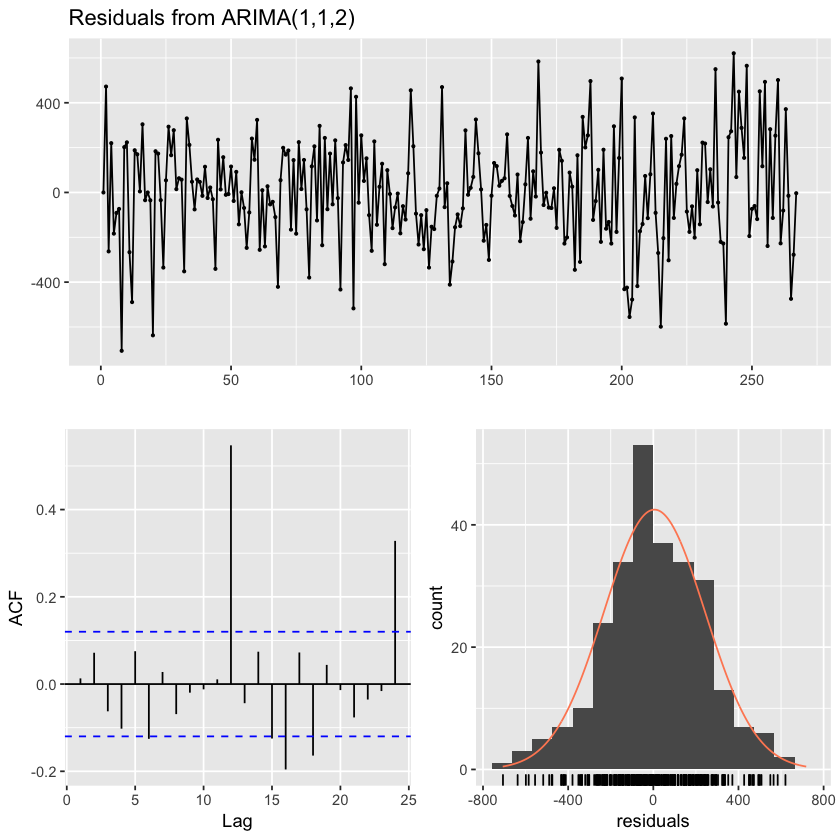

In [186]:
Model.res<-arima(sp.res,order = c(1, 1, 2))
adf.test(Model.res$residuals)
checkresiduals(Model.res)


We see that the residuals of the ARIMA model are stationary but not white noise. There is a seasonal autocorrelation that couldn't be captured using `auto.sarima` function: the used test of seasonality function  (check the help of auto.arima) failed to detect the weak seasonality present in the data. In that case, one could determine (P,D,Q) parameters of the seasonal term manually. To do so, we will try to eliminate seasonality by differentiation (by applying the $1-B^{12}$ operator) using the function `diff(original_data, lag=12, D=order_of_differentiation)`. Then we have to determine the values of $P$ and $Q$.

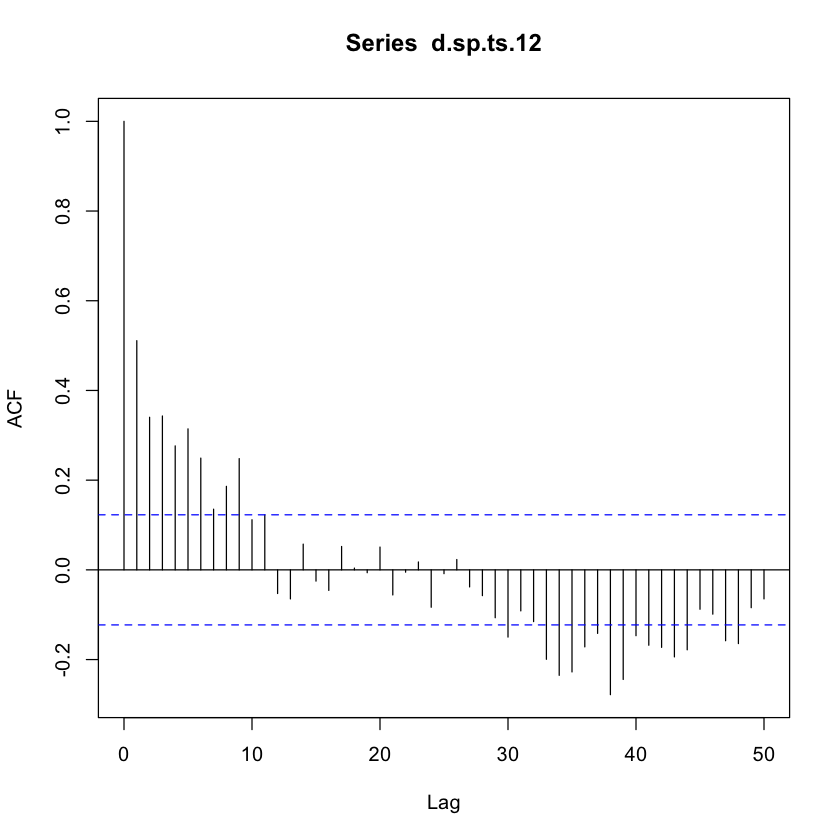

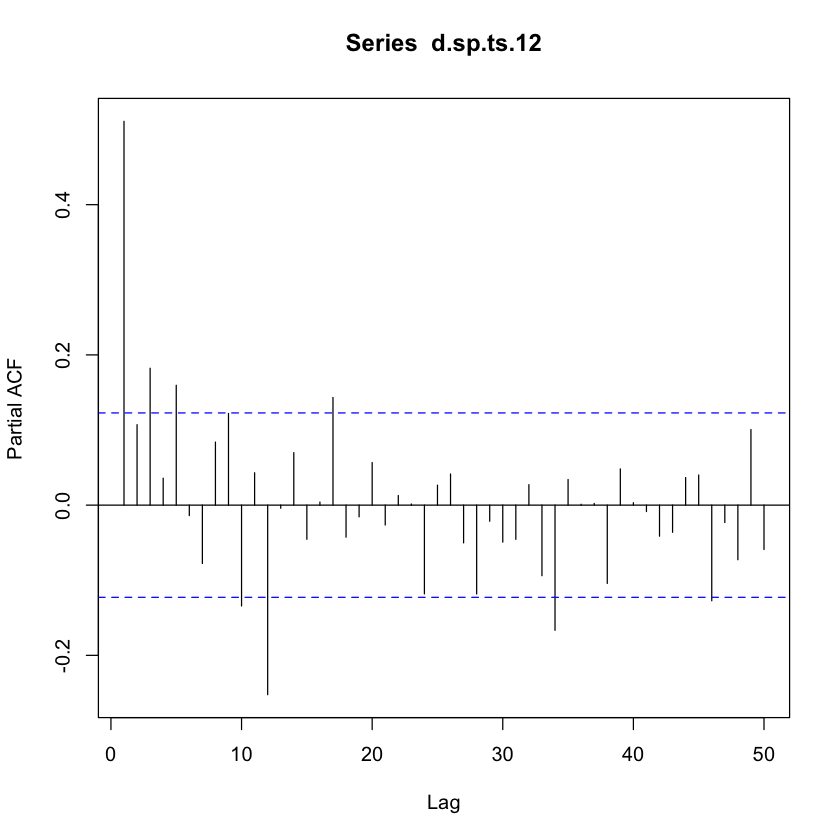

In [187]:
d.sp.ts.12<-diff(sp.res,12,1)
acf(d.sp.ts.12,50)
pacf(d.sp.ts.12,50)

As before, it is some how difficult to determine $P$ and $Q$ from plots. However, one could play with threshold to eliminate light excess. Then, for model simplicity, we will take $max(P,Q)=2$ and select the model having the lowest sigma^2.

In [188]:
arima(sp.res, order = c(1, 1, 2),seasonal = list(order = c(0,1,2), period = 12))$sigma2
arima(sp.res, order = c(1, 1, 2),seasonal = list(order = c(1,1,2), period = 12))$sigma2 #the selected model
arima(sp.res, order = c(1, 1, 2),seasonal = list(order = c(2,1,0), period = 12))$sigma2
arima(sp.res, order = c(1, 1, 2),seasonal = list(order = c(2,1,1), period = 12))$sigma2

[1] 38793.06

[1] 38770.96

[1] 39761.16

Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”

[1] 38766.15

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -15.65    0.01
[2,]   1 -10.92    0.01
[3,]   2  -9.23    0.01
[4,]   3  -8.08    0.01
[5,]   4  -7.03    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -15.62    0.01
[2,]   1 -10.90    0.01
[3,]   2  -9.21    0.01
[4,]   3  -8.06    0.01
[5,]   4  -7.02    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -15.59    0.01
[2,]   1 -10.88    0.01
[3,]   2  -9.18    0.01
[4,]   3  -8.03    0.01
[5,]   4  -6.99    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 

Call:
arima(x = sp.res, order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), period = 12))

Coefficients:
          ar1     ma1      ma2    sar1     sma1     sma2
      -0.6779  0.1323  -0.6293  0.1603  -0.4776  -0.1109
s.e.   0.1357  0.1246   0.0710  0.4768   0.4763   0.2077

sigma^2 estimated as 38771:  log likelihood = -1704.04,  aic = 3422.08

Training set

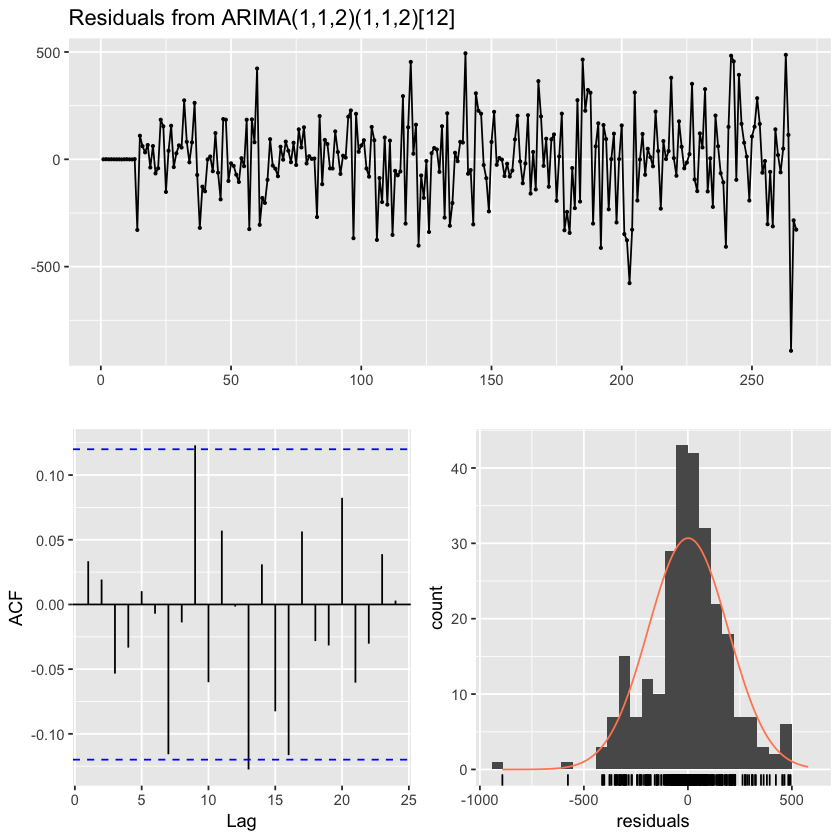

In [189]:
Model.res.s<-arima(sp.res, order = c(1, 1, 2),seasonal = list(order = c(1,1,2), period = 12))
adf.test(Model.res.s$residuals)
summary(Model.res.s)
checkresiduals(Model.res.s)

### To interept more the obtained results

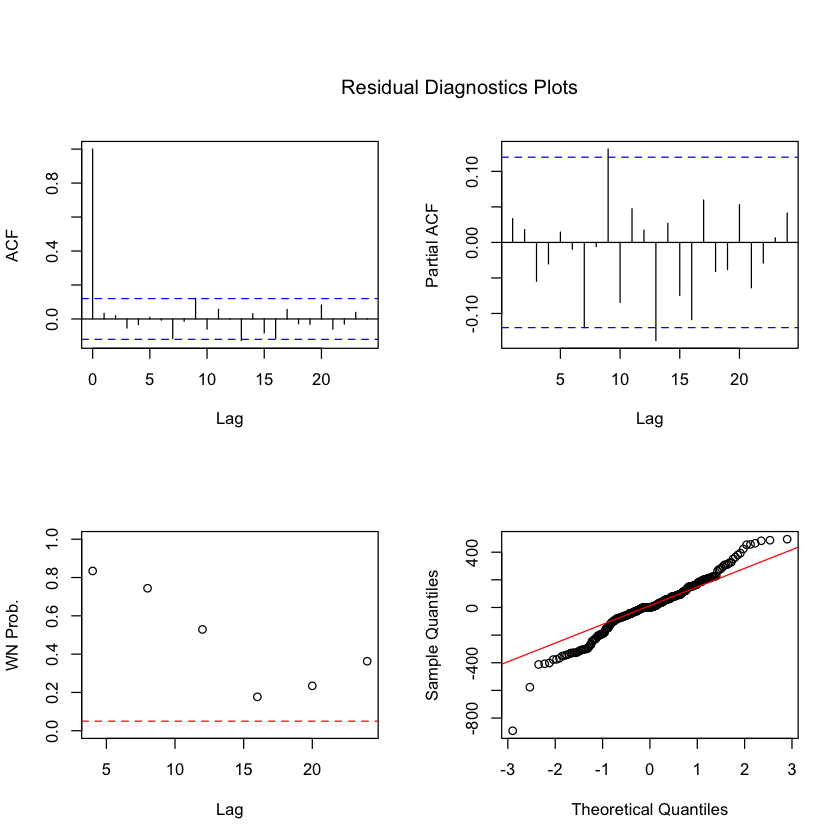

In [190]:
#install.packages("aTSA")
library(aTSA)
ts.diag(Model.res.s)

# III- Forecasting

Forecast for univariate time series: 
    Lead Forecast S.E   Lower Upper
268    1    35.80 197  -350.1   422
269    2   314.91 216  -109.0   739
270    3   201.35 220  -229.2   632
271    4   306.42 231  -147.3   760
272    5   764.94 237   301.0  1229
273    6   155.50 246  -325.9   637
274    7    85.30 252  -407.9   578
275    8   452.96 259   -55.0   961
276    9   198.11 265  -322.0   718
277   10   -22.30 272  -555.7   511
278   11    -5.49 278  -550.9   540
279   12   257.43 285  -300.4   815
280   13    56.34 344  -617.7   730
281   14   273.52 364  -440.6   988
282   15   216.57 374  -516.8   950
283   16   265.70 390  -498.1  1030
284   17   725.62 401   -59.6  1511
285   18   144.11 414  -667.0   955
286   19    49.12 425  -783.7   882
287   20   340.66 437  -515.5  1197
288   21   109.13 448  -768.3   987
289   22    61.06 459  -838.1   960
290   23    40.12 469  -879.6   960
291   24   298.15 480  -642.1  1238
292   25    86.53 520  -933.4  1106
293   26   279.64 541  -77

Warning message in forecast(Model.res.s, 48) + predict(Model2):
“longer object length is not a multiple of shorter object length”

ERROR: Error in eval(expr, envir, enclos): dims [product 240] do not match the length of object [267]


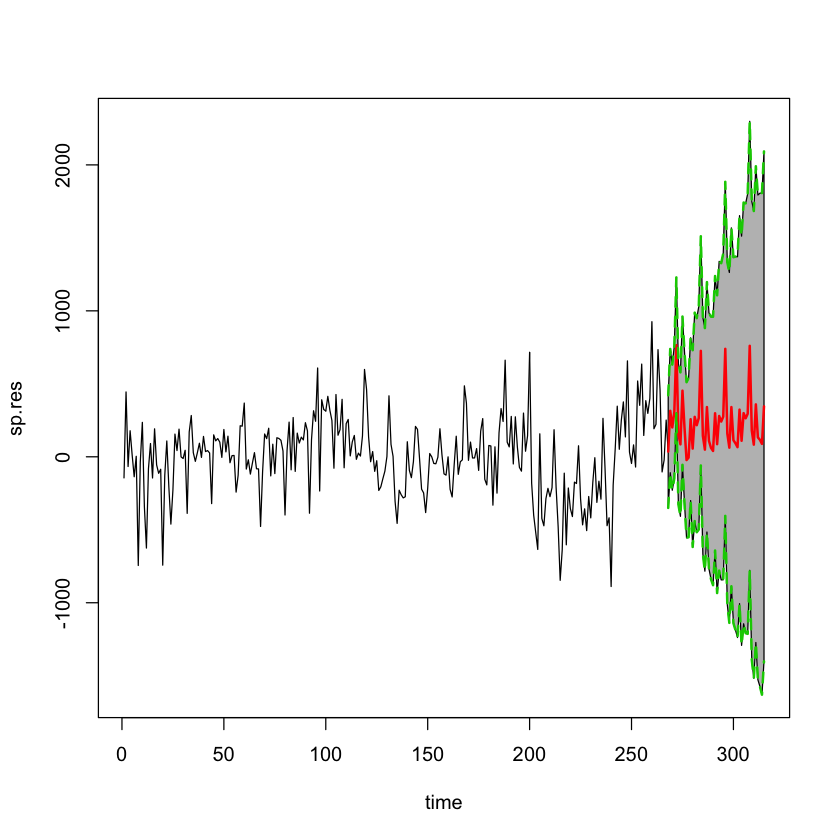

In [202]:
forecast(Model.res.s,48)


## Forecasting using only SARIMA model
We apply sarima model on the original time series

In [213]:
Model.SARIMA<-auto.arima(sp.ts)
summary(Model.SARIMA)

Series: sp.ts 
ARIMA(1,1,2)(0,1,2)[12] 

Coefficients:
          ar1     ma1      ma2     sma1     sma2
      -0.6728  0.1329  -0.6219  -0.3273  -0.1513
s.e.   0.1350  0.1244   0.0691   0.0696   0.0688

sigma^2 estimated as 39204:  log likelihood=-1702.8
AIC=3417.6   AICc=3417.94   BIC=3438.82

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set -5.180352 191.2088 140.4985 -0.1993994 2.25463 0.5655158
                   ACF1
Training set 0.03606216



	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(0,1,2)[12]
Q* = 27.648, df = 19, p-value = 0.09045

Model df: 5.   Total lags used: 24



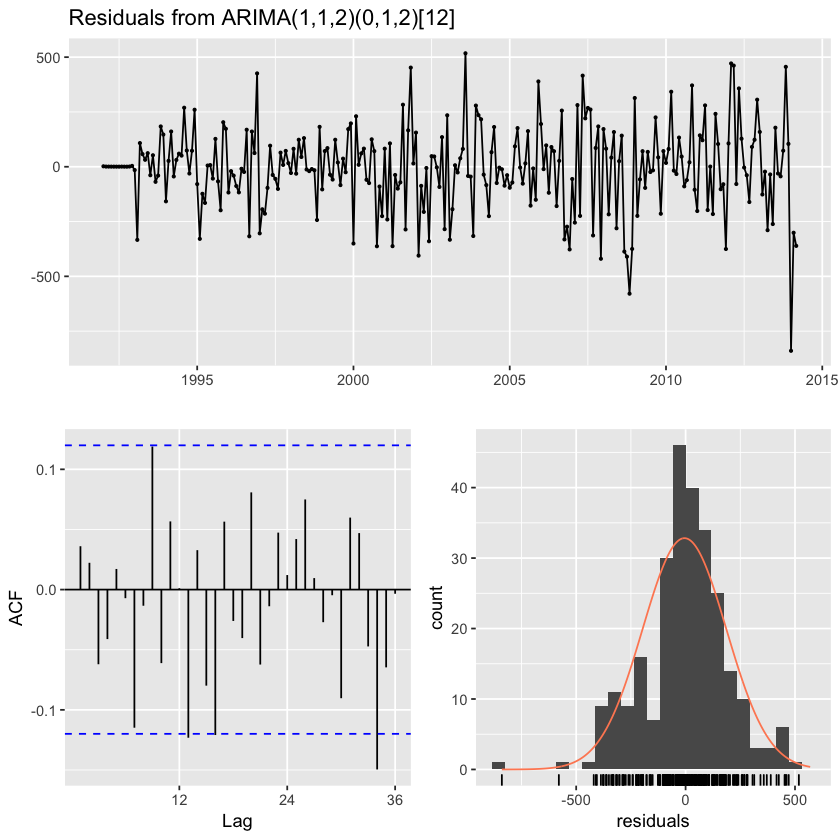

In [214]:
Model.SARIMA.fit<-arima(sp.ts, order = c(1, 1, 2),seasonal = list(order = c(0,1,2), period = 12))
checkresiduals(Model.SARIMA.fit)

Forecast for univariate time series: 
    Lead Forecast S.E Lower Upper
268    1     6377 196  5992  6761
269    2     6854 216  6431  7277
270    3     6938 219  6508  7368
271    4     6900 231  6446  7353
272    5     8386 237  7922  8851
273    6     6915 246  6433  7397
274    7     6467 252  5973  6961
275    8     8062 260  7553  8571
276    9    12183 266 11661 12705
277   10     6702 273  6166  7237
278   11     5876 279  5328  6424
279   12     6878 286  6317  7438
280   13     6419 344  5745  7094
281   14     6842 365  6127  7557
282   15     6976 375  6241  7710
283   16     6879 390  6114  7644
284   17     8381 402  7595  9168
285   18     6924 415  6111  7737
286   19     6453 426  5618  7288
287   20     7989 438  7130  8847
288   21    12132 449 11251 13012
289   22     6803 460  5901  7706
290   23     5947 471  5024  6870
291   24     6951 482  6007  7895
292   25     6470 522  5446  7494
293   26     6874 543  5810  7938
294   27     7020 556  5931  8110
295   28  

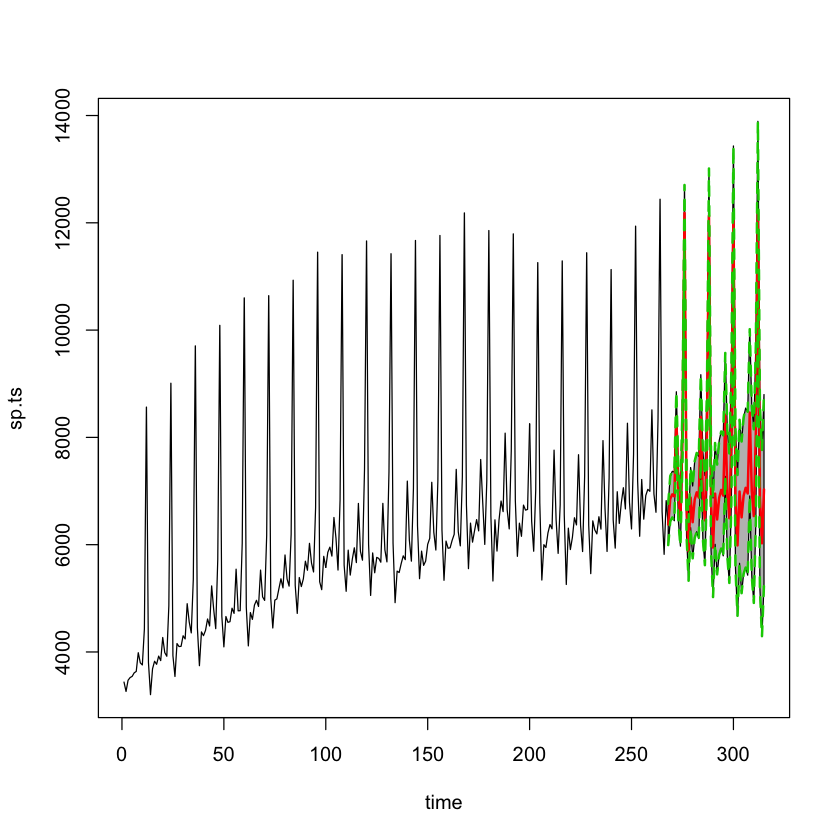

In [215]:
forecast(Model.SARIMA.fit,48)

# IV- Conclusion

From this example of time series analysis, one could highlight the following statements:

1. there is no single way to model a time series.
2. the `auto.arim`` function does not always give reliable results: according to its used arguments, it could miss the best fit. Try to check 'by default' arguments before using it.

3. It is well recommended to use less complex models.
